# Step1: Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step2: Upload the NVIDIA stock dataset

In [3]:
from google.colab import files
uploaded = files.upload() # Upload 'nvidia_stock_price.csv'

Saving nvidia_stock_prices.csv to nvidia_stock_prices.csv


# Step3: Read and preview the dataset

In [7]:
data = pd.read_csv('nvidia_stock_prices.csv')
data = data[['Close']] # Use only the 'close' price
print(data.head())

      Close
0  0.192333
1  0.198583
2  0.206667
3  0.208500
4  0.209250


# step4: Piot closing price history

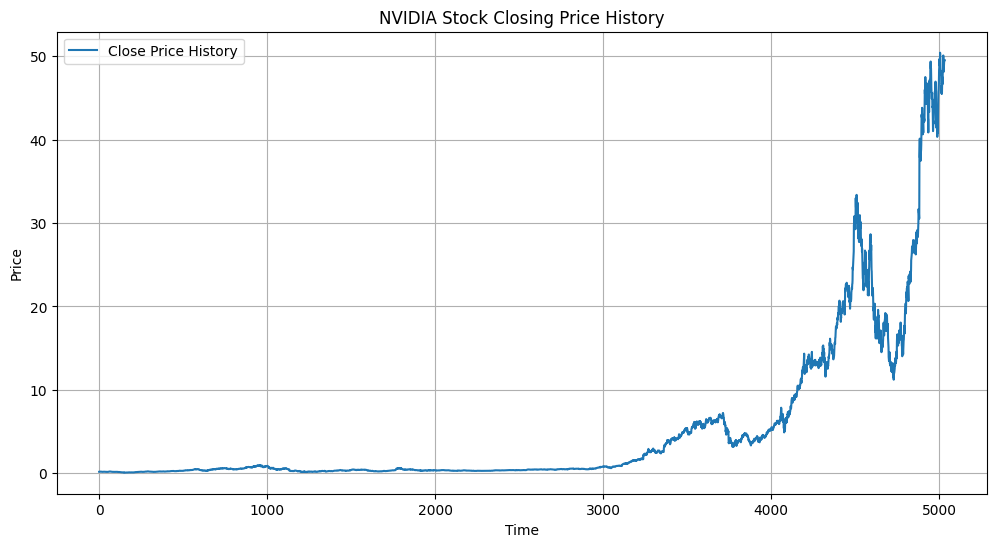

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price History')
plt.title('NVIDIA Stock Closing Price History')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# step5: Normalize and split the data

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Step6: Creste time series sequences

In [23]:
# Convert ot Numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)

# Define the sequence creation function
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i,0])
        y.append(dataset[i,0])
    return np.array(X), np.array(y)

#Create sequences
time_step = 60
x_train, y_train = create_sequences(train_data, time_step)
x_test, y_test = create_sequences(test_data, time_step)

#Reshape input ot 3D for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


# Setp7: Build the LSTM model

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add (Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

# step8: Train the model

In [26]:
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 2.5126e-04
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 8.1909e-06
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 7.4582e-06
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 8.0393e-06
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 6.9943e-06
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 9.7436e-06
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 7.2325e-06
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 5.4424e-06
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 5.9096e-06
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 6.4523e-06


# step9: Make predictions

In [27]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Inverse trasnform ot original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


# step10: Plot predictions vs Actual values

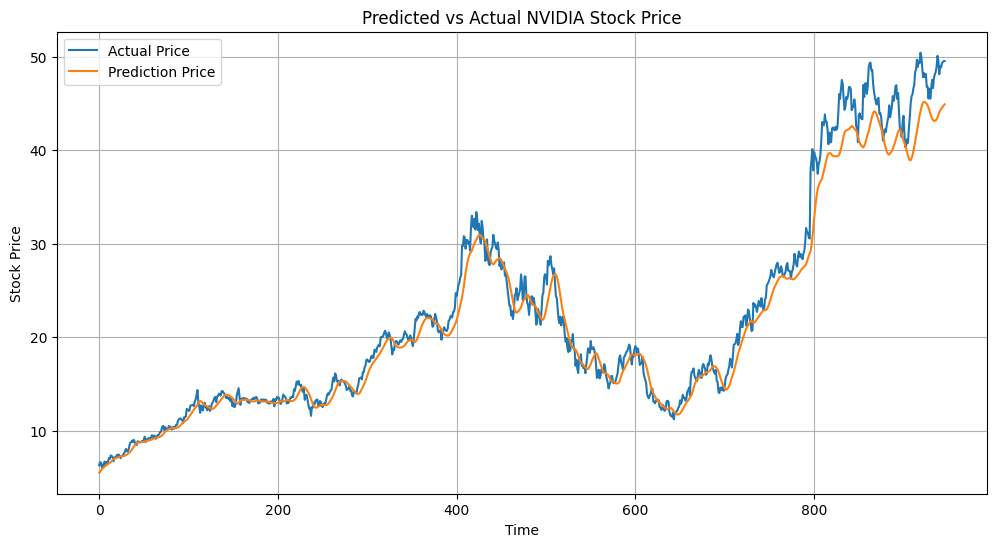

In [29]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Price')
test_predict_indices = np.arange(len(y_test_actual))
plt.plot(test_predict_indices, test_predict, label='Prediction Price')
plt.title('Predicted vs Actual NVIDIA Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# step11: Evaluate model performance

In [31]:
mse = mean_squared_error(y_test_actual, test_predict)
mae = mean_absolute_error(y_test_actual, test_predict)
print(f'Mean Squared Error:{mse:.4f}')
print(f'Mean Absolute Error:{mae:.4f}')

Mean Squared Error:4.4001
Mean Absolute Error:1.4099
